In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('data.csv')
print(data.shape)

(18207, 89)


In [4]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
def country(x):
    return data[data['Nationality'] == x][['Name','Overall','Potential','Position']]

country('India')

,Name,Overall,Potential,Position
8605,S. Chhetri,67,67,LS
10011,S. Jhingan,65,71,RCB
12598,J. Lalpekhlua,63,64,RS
12811,G. Singh Sandhu,63,68,GK
13508,A. Edathodika,62,62,LCB
14054,P. Halder,61,67,RCM
14199,P. Kotal,61,66,RB
14218,L. Ralte,61,62,LW
14705,N. Das,60,65,LB
14786,U. Singh,60,67,RM


In [6]:
def club(x):
    return data[data['Club'] == x][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

club('Real Madrid')

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
6,L. Modrić,10.0,RCM,91,Croatia,32,€420K,€67M,2020
8,Sergio Ramos,15.0,RCB,91,Spain,32,€380K,€51M,2020
11,T. Kroos,8.0,LCM,90,Germany,28,€355K,€76.5M,2022
19,T. Courtois,1.0,GK,89,Belgium,26,€240K,€53.5M,2024
27,Casemiro,14.0,CDM,88,Brazil,26,€285K,€59.5M,2021
30,Isco,22.0,LW,88,Spain,26,€315K,€73.5M,2022
35,Marcelo,12.0,LB,88,Brazil,30,€285K,€43M,2022
36,G. Bale,11.0,ST,88,Wales,28,€355K,€60M,2022
46,K. Navas,1.0,GK,87,Costa Rica,31,€195K,€30.5M,2020
62,R. Varane,4.0,RCB,86,France,25,€210K,€50M,2022


In [7]:
x = club('Real Madrid')
x.shape

(33, 9)

In [8]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [9]:
# checking if the data contains any NULL value

data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

### Data Cleaning

In [10]:
missing_values={}
for i,col in enumerate(data.columns):
  nb_missing=data[col].isnull().sum()
  if nb_missing >0:
    missing_values[i]=[col,nb_missing]

<AxesSubplot:xlabel='Missing values', ylabel='Feature'>

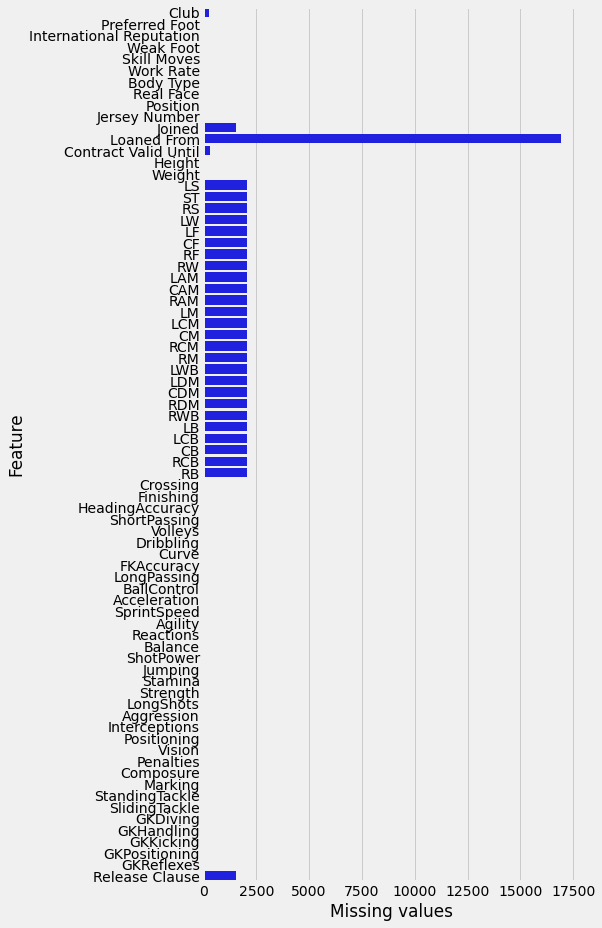

In [11]:
f, ax = plt.subplots(figsize=(6, 15))

data_missing=pd.DataFrame.from_dict(missing_values,orient='index',columns=['Feature','Missing values'])
sns.barplot(data=data_missing,x='Missing values',y='Feature',color='b')

In [12]:
# filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [13]:
data.fillna(0, inplace = True)

exploratory data analysis


In [14]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.112924,2.947438,2.360356,19.508046,...,48.420607,58.493656,47.156973,47.572088,45.541056,16.572417,16.348382,16.189268,16.345691,16.666831
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.393554,0.659591,0.755394,15.935210,...,15.879699,11.810375,20.025458,21.773243,21.389596,17.692536,16.905507,16.502101,17.032944,17.951898
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      18207 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [16]:
data.duplicated().sum()

0

In [17]:
print(len(data['Age'].unique()))
print(len(data['Name'].unique()))
print(len(data['Nationality'].unique()))


29
17194
164


In [18]:
data.corr()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.596508,-0.413535,-0.203689,-0.416201,0.211294,...,-0.339819,-0.702345,-0.283456,-0.251353,-0.222981,0.025744,0.024948,0.028539,0.017796,0.023619
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.355900,-0.075642,-0.057126,0.181202,...,-0.140657,-0.374447,-0.110728,-0.086649,-0.069247,-0.105930,-0.111482,-0.107001,-0.118564,-0.106111
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253457,0.059790,0.027641,-0.240711,...,0.137857,0.378028,0.141761,0.118997,0.102495,0.101104,0.106229,0.104774,0.116189,0.103137
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499654,0.211779,0.414906,-0.216928,...,0.341984,0.711350,0.288075,0.254448,0.224815,-0.024374,-0.023450,-0.027729,-0.016088,-0.021732
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372887,0.161922,0.354516,-0.008466,...,0.227017,0.434343,0.165874,0.146630,0.132096,-0.051490,-0.052650,-0.056998,-0.050588,-0.051402
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292186,0.341720,0.763113,-0.133015,...,0.726279,0.729016,0.558374,0.535982,0.504501,-0.673324,-0.672251,-0.668857,-0.666922,-0.671943
International Reputation,-0.413535,-0.355900,0.253457,0.499654,0.372887,0.292186,1.000000,0.128241,0.208429,-0.076535,...,0.218206,0.383554,0.116134,0.093905,0.080307,0.005231,0.004670,0.001394,0.007622,0.004144
Weak Foot,-0.203689,-0.075642,0.059790,0.211779,0.161922,0.341720,0.128241,1.000000,0.340515,-0.035681,...,0.325523,0.267918,0.064693,0.041916,0.025500,-0.231832,-0.233011,-0.229308,-0.231217,-0.232503
Skill Moves,-0.416201,-0.057126,0.027641,0.414906,0.354516,0.763113,0.208429,0.340515,1.000000,-0.034060,...,0.685536,0.573566,0.242549,0.211877,0.180165,-0.619585,-0.617583,-0.614782,-0.616703,-0.619859
Jersey Number,0.211294,0.181202,-0.240711,-0.216928,-0.008466,-0.133015,-0.076535,-0.035681,-0.034060,1.000000,...,-0.021922,-0.152192,-0.136573,-0.127976,-0.119477,0.006613,0.003482,0.003075,-0.000865,0.005065


<AxesSubplot:>

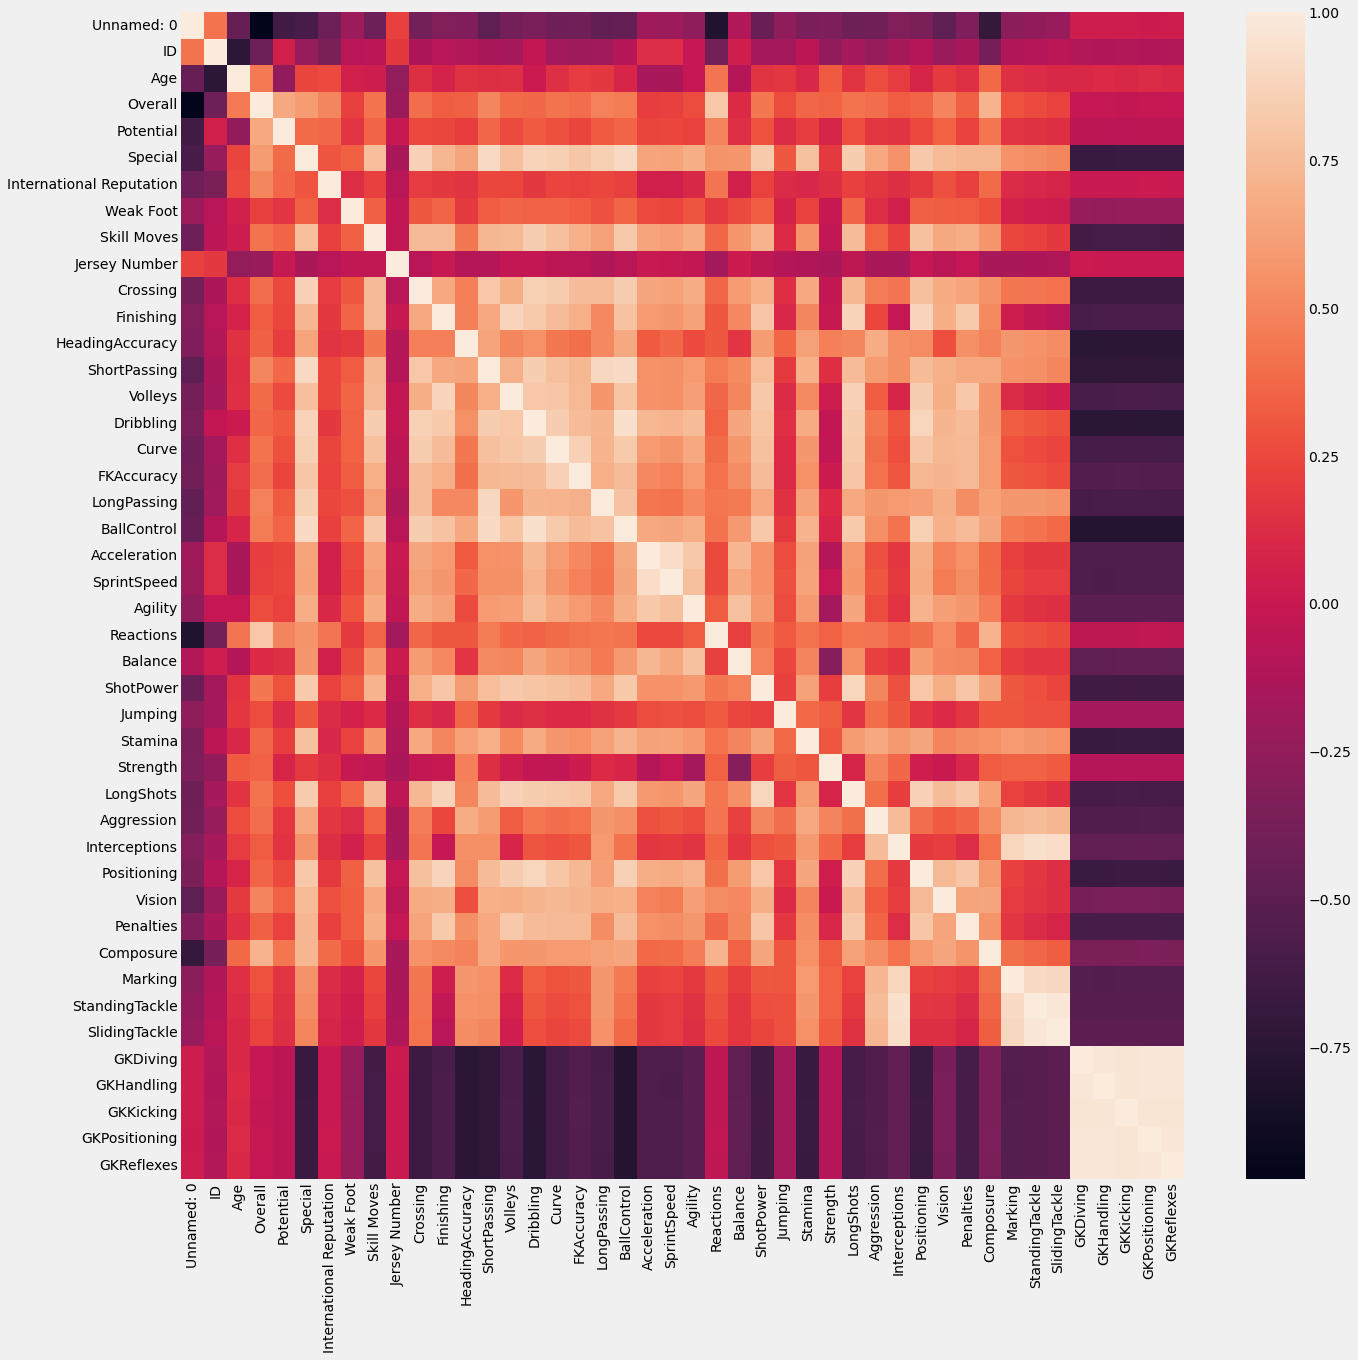

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

### Data Visualization

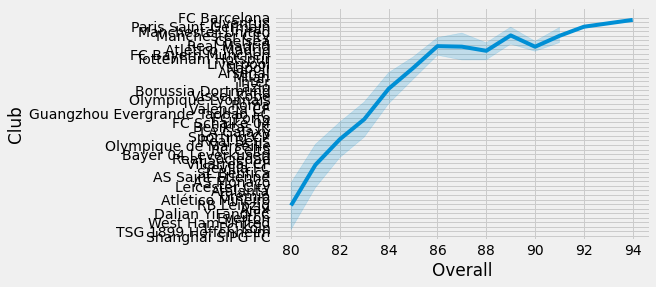

In [20]:
d1 =data.head(500)
sns.lineplot(x='Overall', y='Club',data=d1)
plt.show()

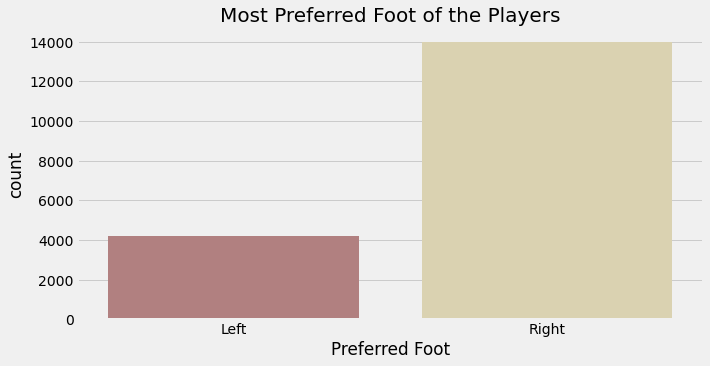

In [21]:
# comparison of preferred foot over the different players
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

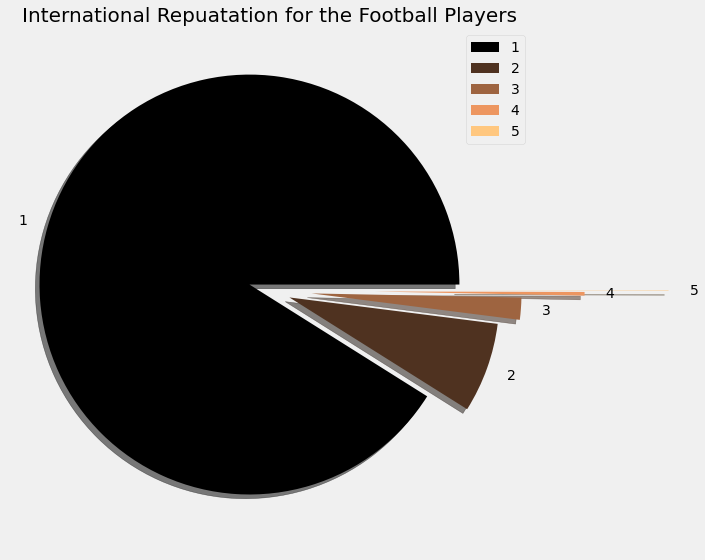

In [22]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

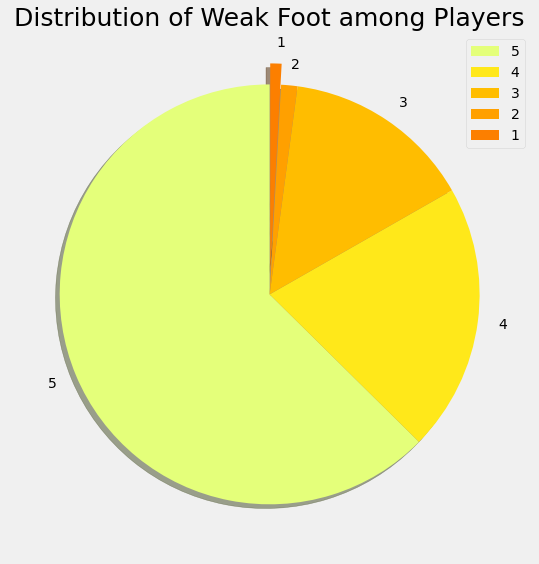

In [23]:
# plotting a pie chart to represent the share of week foot players

labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Weak Foot among Players', fontsize = 25)
plt.legend()
plt.show()

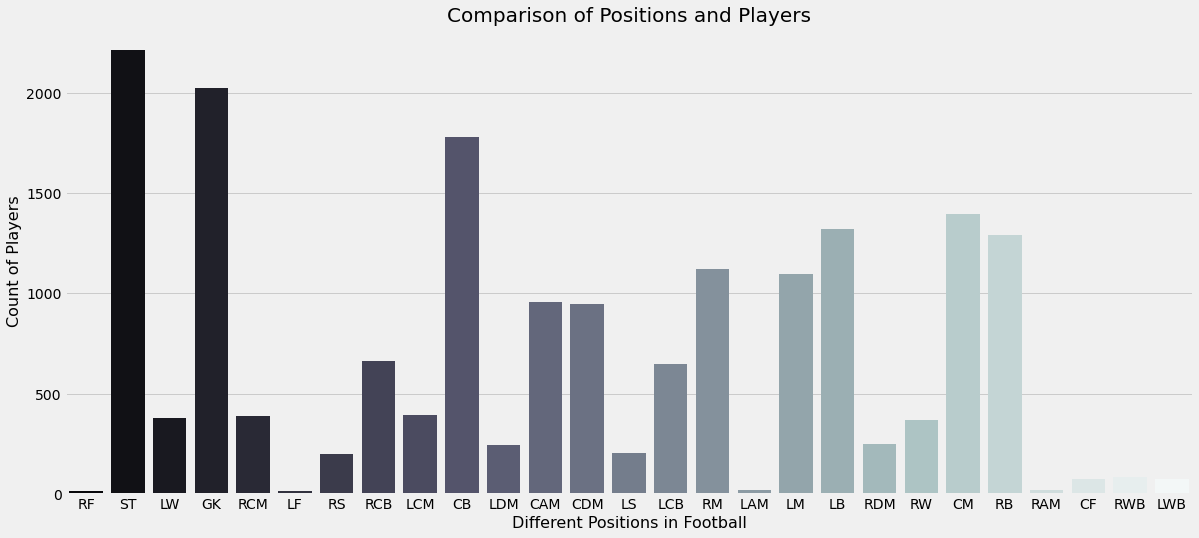

In [24]:
# different positions acquired by the players 
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [25]:
# defining a function for cleaning the Weight data

def extract_value_from(value):
  out = value.replace('lbs', '')
  return float(out)

# applying the function to weight column
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [26]:
# defining a function for cleaning the wage column

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [27]:
# applying the function to the wage column

data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

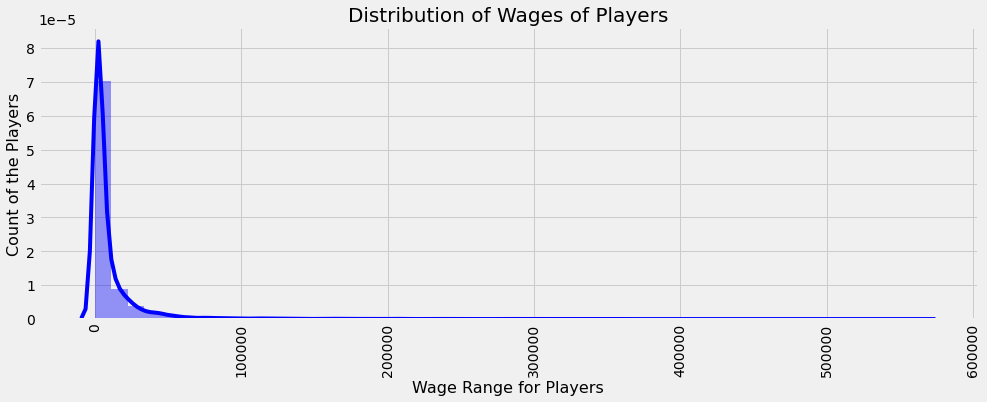

In [28]:
# Comparing the players' Wages

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['Wage'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Wages of Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

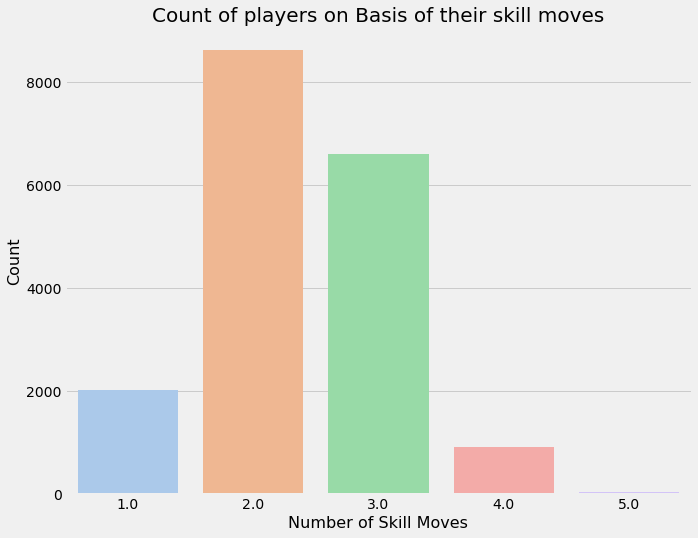

In [29]:


plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

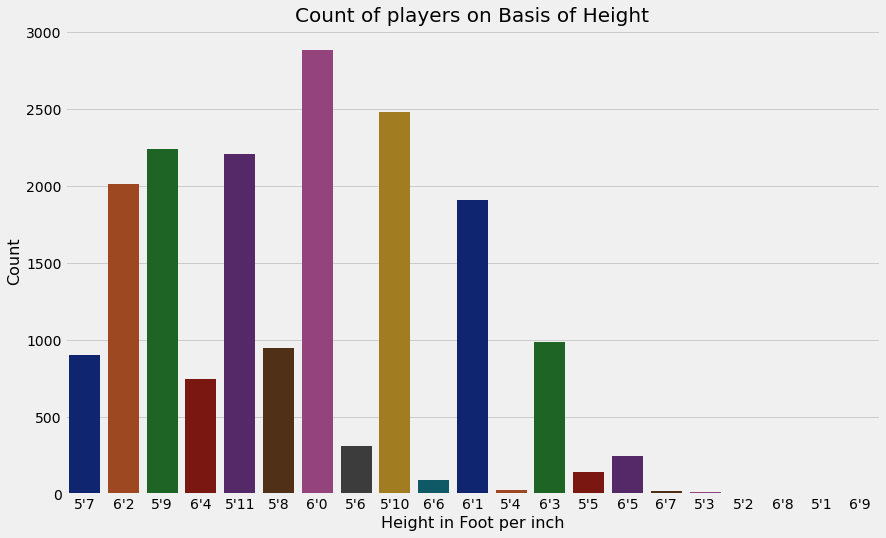

In [30]:


plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

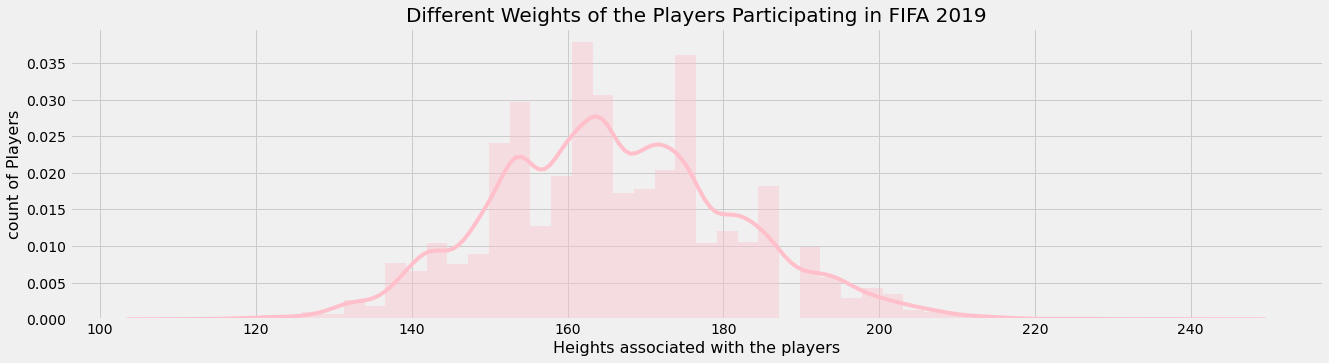

In [31]:


plt.figure(figsize = (20, 5))
sns.distplot(data['Weight'], color = 'pink')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

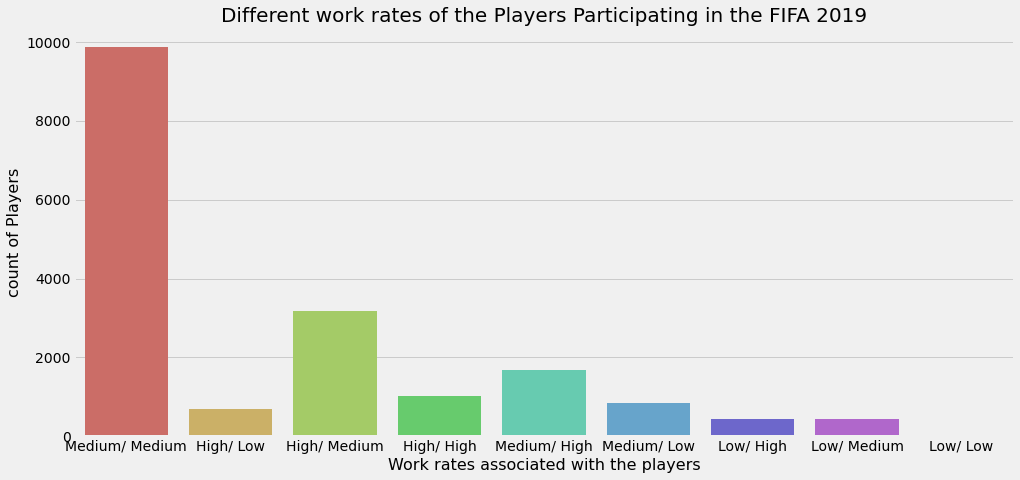

In [32]:

plt.figure(figsize = (15, 7))

sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

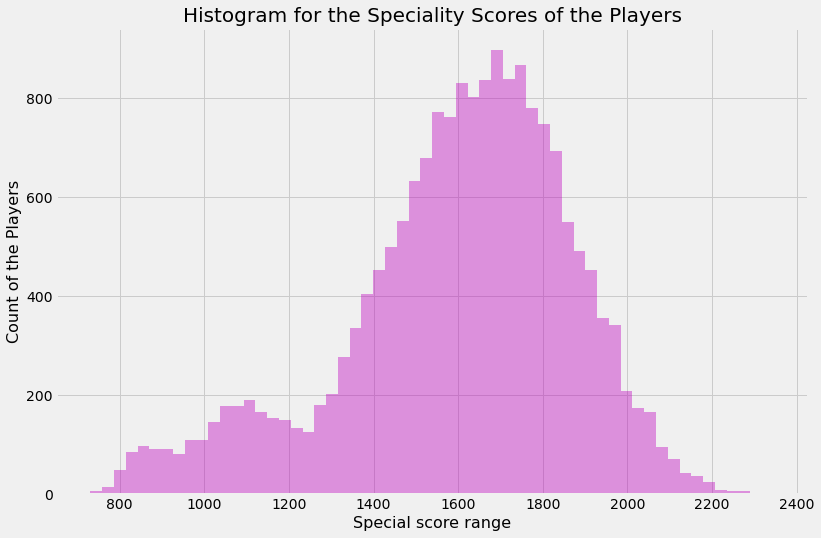

In [33]:


x = data.Special
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')

ax = sns.distplot(x, bins = 58, kde = False, color = 'm')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

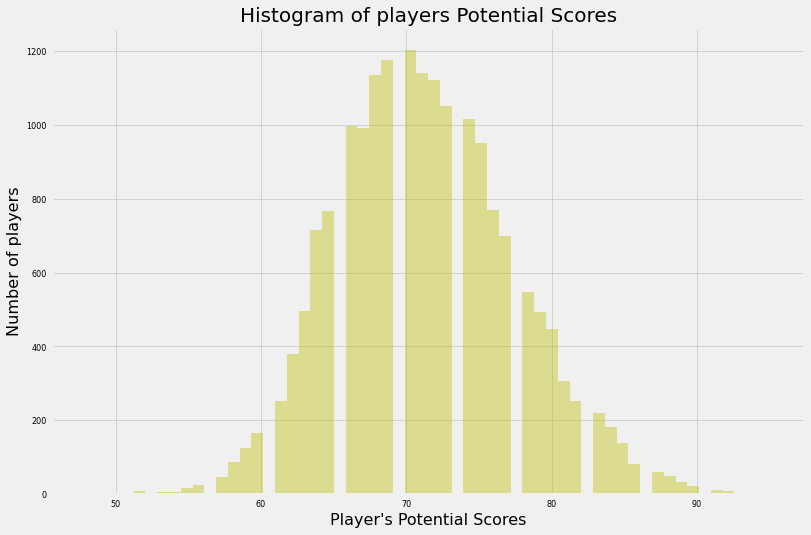

In [34]:
# To show Different potential scores of the players participating in the FIFA 2019

x = data.Potential
plt.figure(figsize=(12,8))
plt.style.use('seaborn-paper')

ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.show()

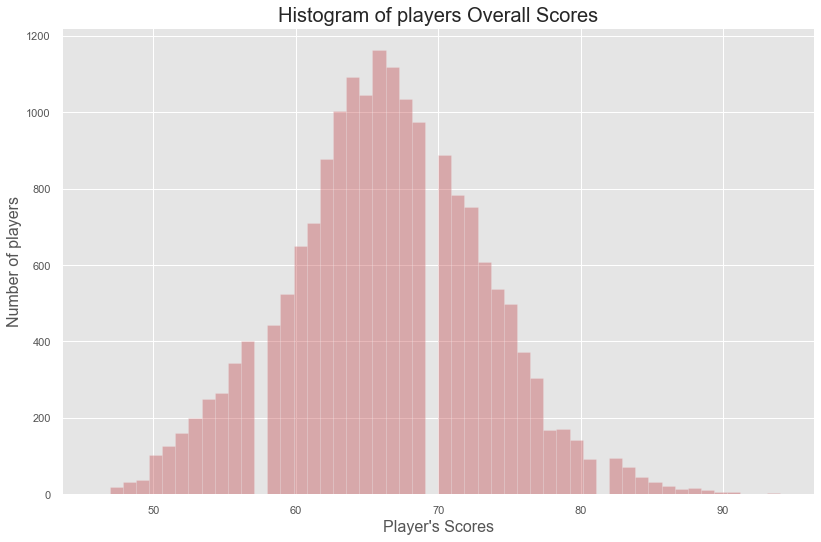

In [35]:
# To show Different overall scores of the players participating in the FIFA 2019

sns.set(style = "dark", palette = "deep", color_codes = True)
x = data.Overall
plt.figure(figsize = (12,8))
plt.style.use('ggplot')

ax = sns.distplot(x, bins = 52, kde = False, color = 'r')
ax.set_xlabel(xlabel = "Player\'s Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 20)
plt.show()

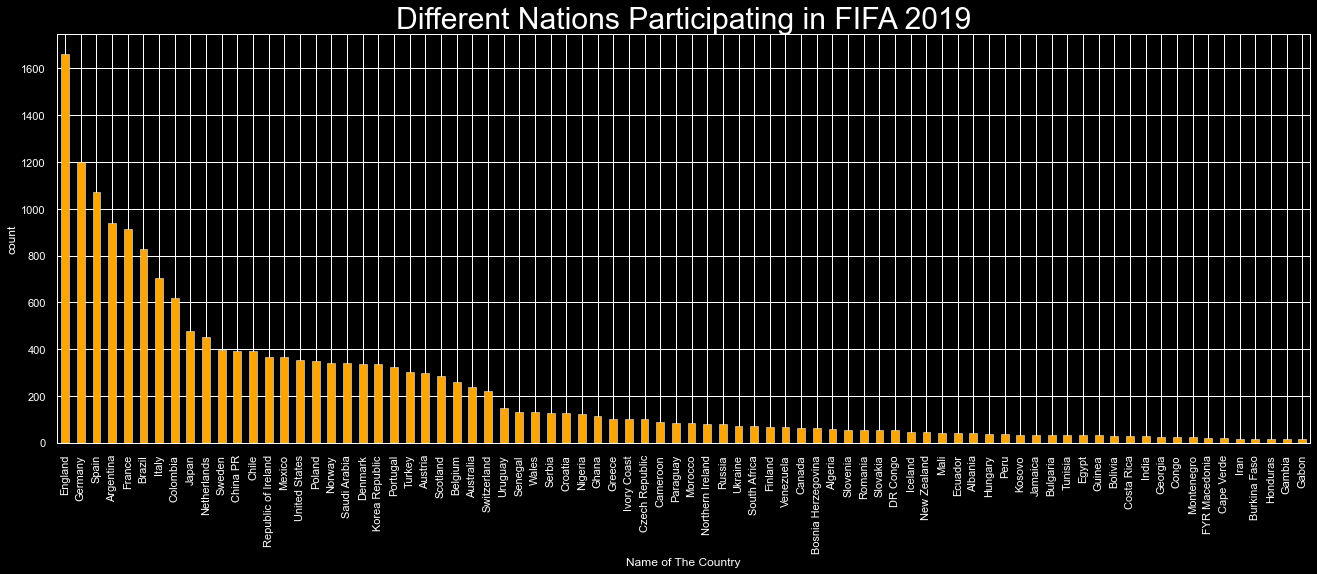

In [36]:
# To show Different nations participating in the FIFA 2019

plt.style.use('dark_background')
data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FIFA 2019', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

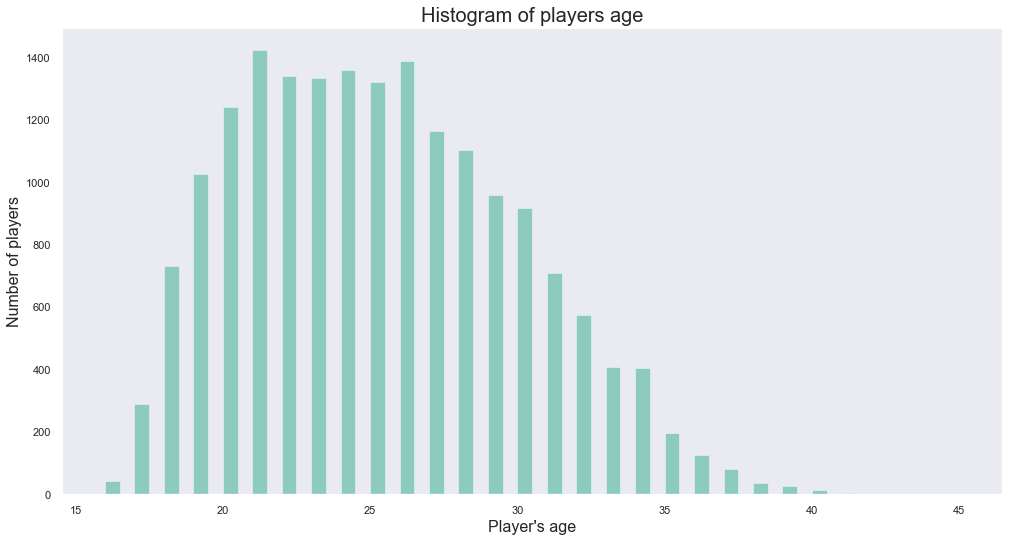

In [37]:
# To visualize age of players

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.Age
plt.figure(figsize = (15,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

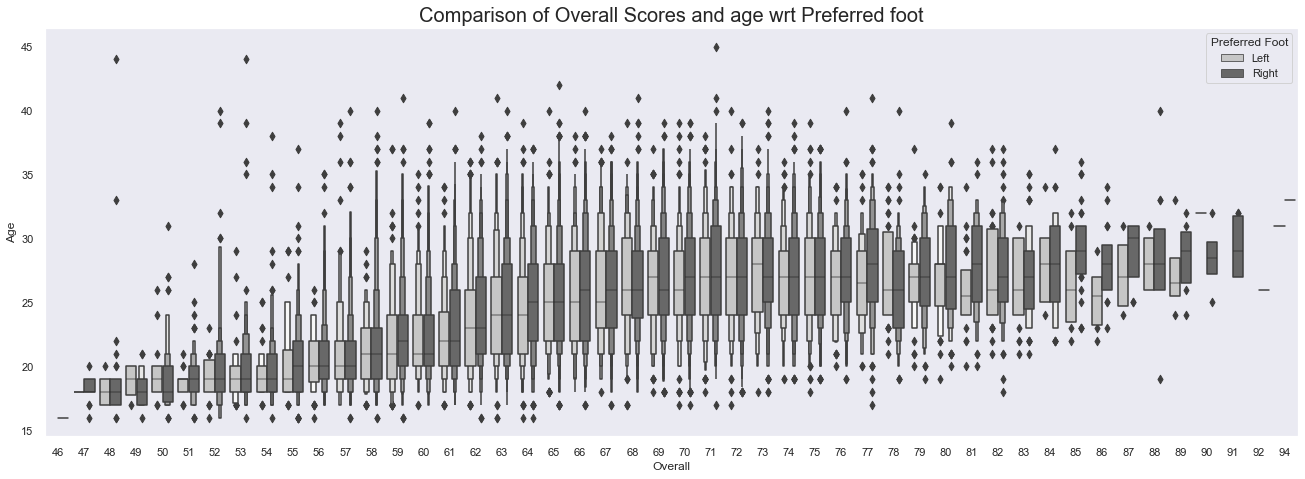

In [38]:
# violin plot 

plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(data['Overall'], data['Age'], hue = data['Preferred Foot'], palette = 'Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

#### Best Players per each position with their age, club, and nationality based on their Overall Scores

In [39]:
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']].style.background_gradient('Reds')

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


#### Best Players from each positions with their age, nationality, club based on their Potential Scores

In [40]:
data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name','Age', 'Club', 'Nationality']].style.background_gradient('Blues')

,Position,Name,Age,Club,Nationality
31,CAM,C. Eriksen,26,Tottenham Hotspur,Denmark
42,CB,S. Umtiti,24,FC Barcelona,France
27,CDM,Casemiro,26,Real Madrid,Brazil
350,CF,A. Milik,24,Napoli,Poland
78,CM,S. Milinković-Savić,23,Lazio,Serbia
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
77,LCB,M. Škriniar,23,Inter,Slovakia
11,LCM,T. Kroos,28,Real Madrid,Germany


#### Countries with Most Players

In [41]:
data['Nationality'].value_counts().head(8)

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Brazil        827
Italy         702
Colombia      618
Name: Nationality, dtype: int64

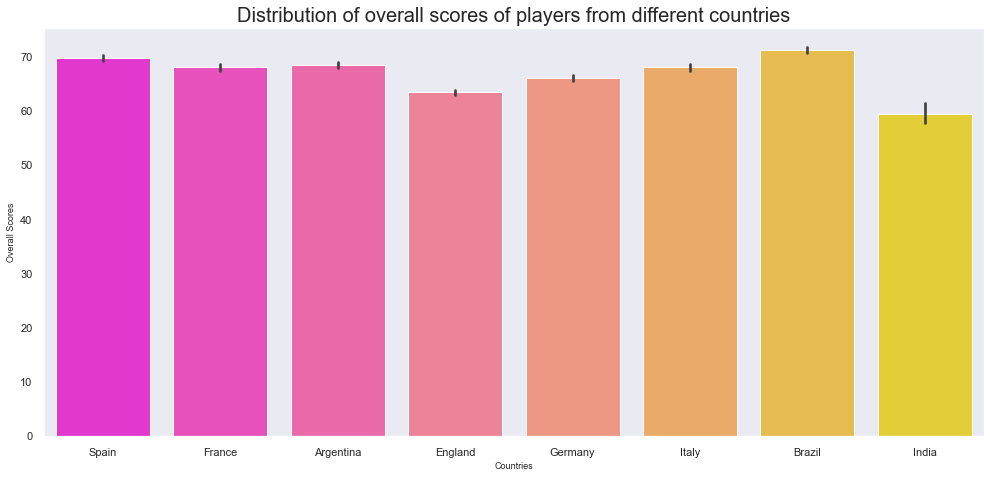

In [42]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia', 'India')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

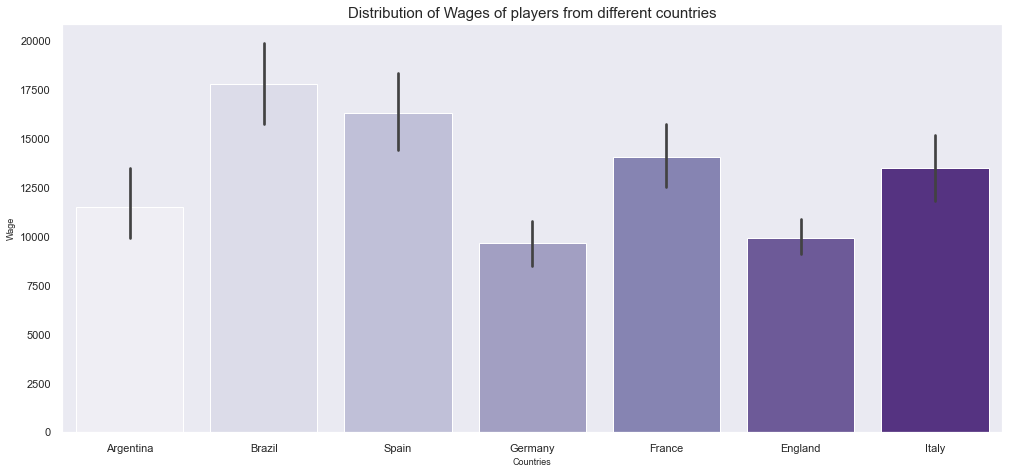

In [43]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia', 'India')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.show()

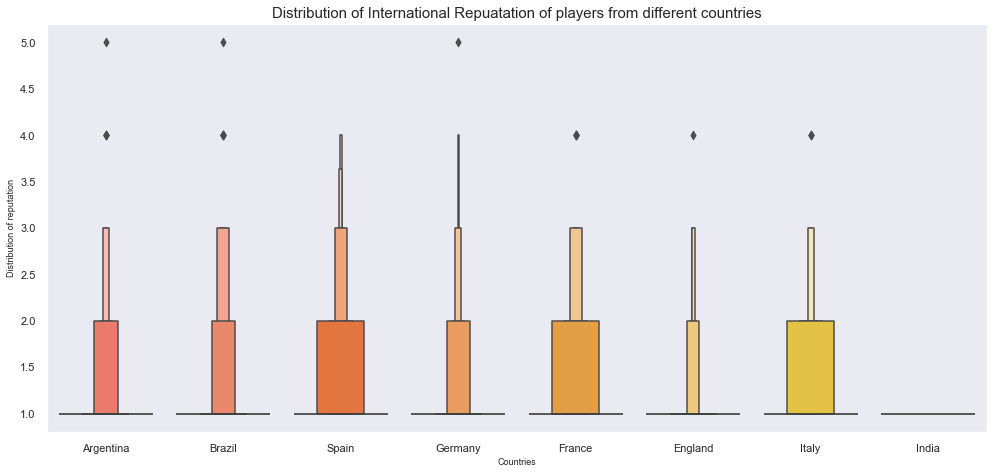

In [44]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia', 'India')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.show()

In [45]:
data['Club'].value_counts().head(10)

No Club                    241
FC Barcelona                33
Burnley                     33
AS Monaco                   33
Everton                     33
TSG 1899 Hoffenheim         33
Wolverhampton Wanderers     33
Eintracht Frankfurt         33
Southampton                 33
Valencia CF                 33
Name: Club, dtype: int64

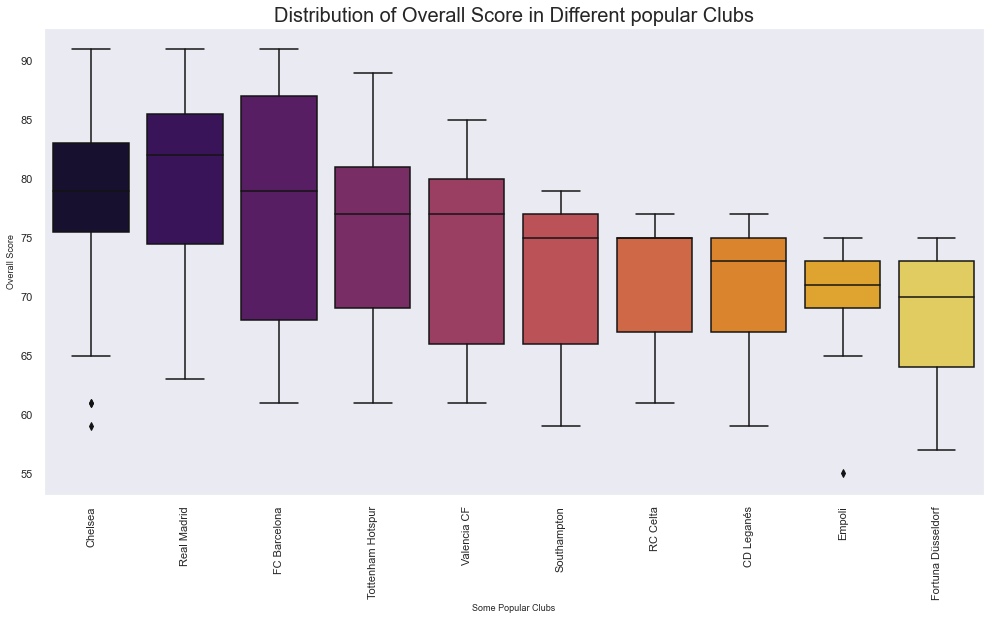

In [46]:
some_clubs = ('Real Madrid', 'CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

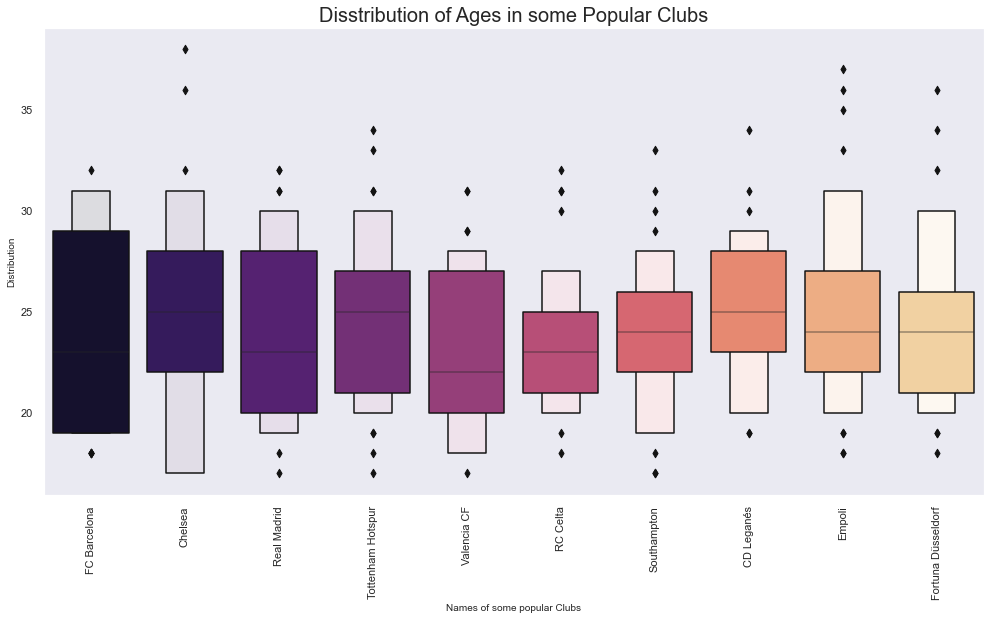

In [47]:
some_clubs = ('Real Madrid', 'CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

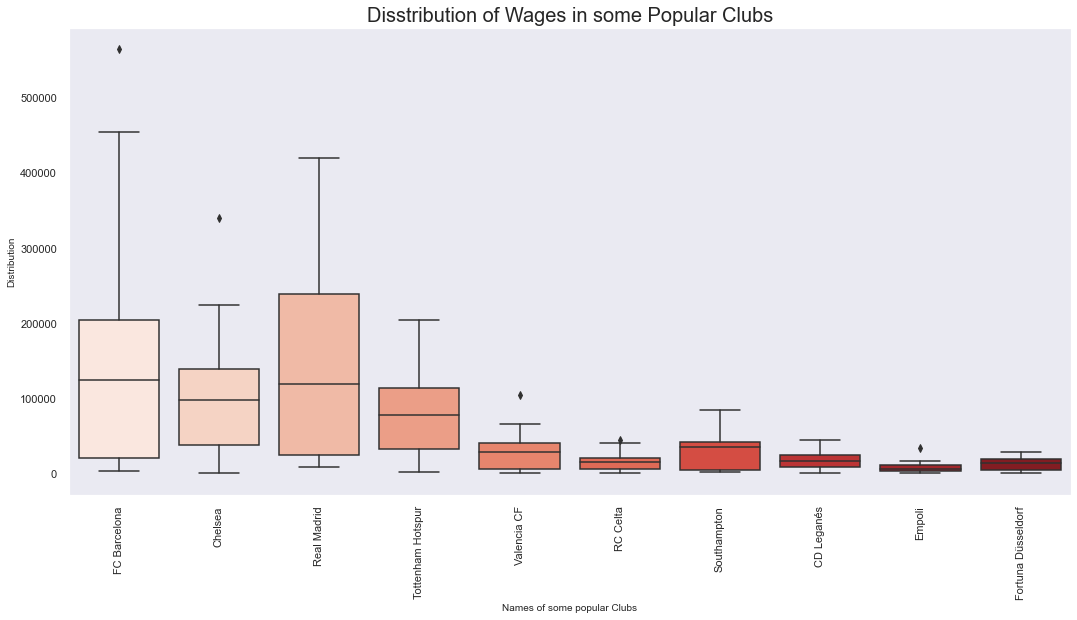

In [48]:


some_clubs = ('Real Madrid', 'CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

#### 15 youngest Players from the FIFA 2019

In [49]:
data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
18206,G. Nugent,16,Tranmere Rovers,England
17743,J. Olstad,16,Sarpsborg 08 FF,Norway
13293,H. Massengo,16,AS Monaco,France
16081,J. Italiano,16,Perth Glory,Australia
18166,N. Ayéva,16,Örebro SK,Sweden
17712,K. Broda,16,Wisła Kraków,Poland
17354,L. D'Arrigo,16,Adelaide United,Australia
13567,Y. Verschaeren,16,RSC Anderlecht,Belgium
16927,B. Nygren,16,IFK Göteborg,Sweden
18018,B. O'Gorman,16,Bray Wanderers,Republic of Ireland


#### 15 Eldest Players from FIFA 2019

In [50]:
data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('inferno')

,Name,Age,Club,Nationality
4741,O. Pérez,45,Pachuca,Mexico
18183,K. Pilkington,44,Cambridge United,England
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago
10545,S. Narazaki,42,Nagoya Grampus,Japan
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina
1120,J. Villar,41,No Club,Paraguay
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia
15426,M. Tyler,41,Peterborough United,England
4228,B. Nivet,41,ESTAC Troyes,France
10356,F. Kippe,40,Lillestrøm SK,Norway


In [51]:
data['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

#### Defining the features of players

In [52]:
player_features = ('Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 'Composure', 'Crossing', 'Dribbling',
                   'FKAccuracy', 'Finishing', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

In [53]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

#### Top 10 left footed footballers

In [ ]:
data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10).style.background_gradient('magma')

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
24,G. Chiellini,33,Juventus,Italy
26,M. Salah,26,Liverpool,Egypt
28,J. Rodríguez,26,FC Bayern München,Colombia
35,Marcelo,30,Real Madrid,Brazil
36,G. Bale,28,Real Madrid,Wales


#### Top 10 Right footed footballers

In [ ]:
data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10).style.background_gradient('copper')

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


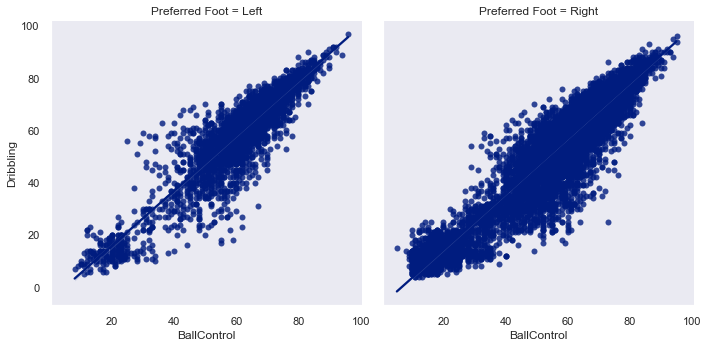

In [ ]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

#### Clubs with highest number of different countries

In [ ]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
West Ham United           18
Empoli                    18
AS Monaco                 18
Eintracht Frankfurt       18
Lazio                     18
Napoli                    18
Name: Nationality, dtype: int64

#### Clubs with lowest number of different countries

In [ ]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10)

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64

### Lets Create a Function to check the Player's Details

In [ ]:
def playerdata(x):
    return data.loc[x,:]

x = playerdata(0)  #lionel messi, id = 0.
pd.set_option('display.max_rows', 200)
x = pd.DataFrame(x)
print(x)

                                                                       0
Unnamed: 0                                                             0
ID                                                                158023
Name                                                            L. Messi
Age                                                                   31
Photo                     https://cdn.sofifa.org/players/4/19/158023.png
Nationality                                                    Argentina
Flag                                 https://cdn.sofifa.org/flags/52.png
Overall                                                               94
Potential                                                             94
Club                                                        FC Barcelona
Club Logo                   https://cdn.sofifa.org/teams/2/light/241.png
Value                                                        110500000.0
Wage                                               

#### Correlation heatmap

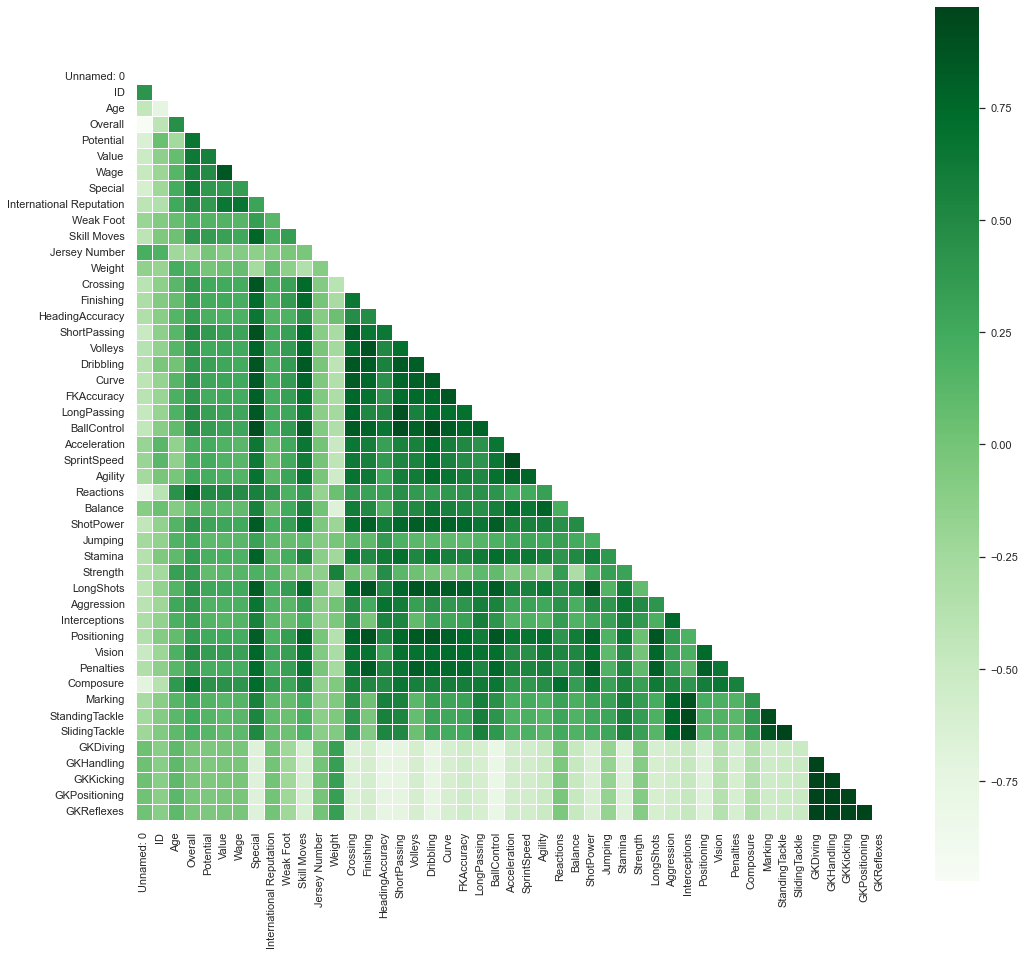

In [ ]:
correlations = data.corr()
hm = np.zeros_like(correlations)
hm[np.triu_indices_from(hm)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(correlations,mask=hm,square=True,linewidths=.8,cmap="Greens")

#### Modelling

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
team = data.groupby('Club',as_index=False)['Overall','Potential','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'].sum()
team.sort_values(by='Club', ascending=True, inplace=True)
team1 = team.sort_values(by='Club', ascending=False, inplace=False)

In [ ]:
import numpy as np
col = [0]*100
ov1 = team['Overall'].head(100).values
ov2 = team1['Overall'].head(100).values

In [ ]:
ovt1 = team['Overall'].values
ovt2 = team1['Overall'].values
col1 = [0]*100
for i in range(100):
    col1[i]=ovt1[i]-ovt2[i]
Y_train1 = col1

In [ ]:


for i in range(100):
    if ov1[i]>ov2[i]:
        col[i]=1
    else:
        col[i]=0 

temp = pd.DataFrame({'Overall1': ov1, 'Overall2': ov2,'WinLoss': col}, columns=['Overall1', 'Overall2','WinLoss'])

 
X_train = temp[['Overall2','Overall1']].values
Y_train = temp['WinLoss']
print(X_train.shape)
print(Y_train[1])

(100, 2)
0     1
1     1
2     1
3     0
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    1
12    1
13    0
14    0
15    0
16    1
17    1
18    0
19    1
20    1
21    1
22    0
23    0
24    0
25    0
26    1
27    0
28    1
29    0
30    1
31    0
32    1
33    1
34    0
35    1
36    1
37    1
38    0
39    1
40    1
41    1
42    1
43    1
44    0
45    0
46    0
47    0
48    1
49    1
50    1
51    0
52    1
53    1
54    1
55    0
56    1
57    1
58    1
59    0
60    0
61    1
62    1
63    1
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    1
73    1
74    1
75    1
76    0
77    1
78    1
79    1
80    0
81    0
82    1
83    0
84    0
85    1
86    1
87    1
88    0
89    1
90    1
91    1
92    0
93    1
94    1
95    1
96    0
97    1
98    0
99    1
Name: 1, dtype: uint8


Logistic Regression

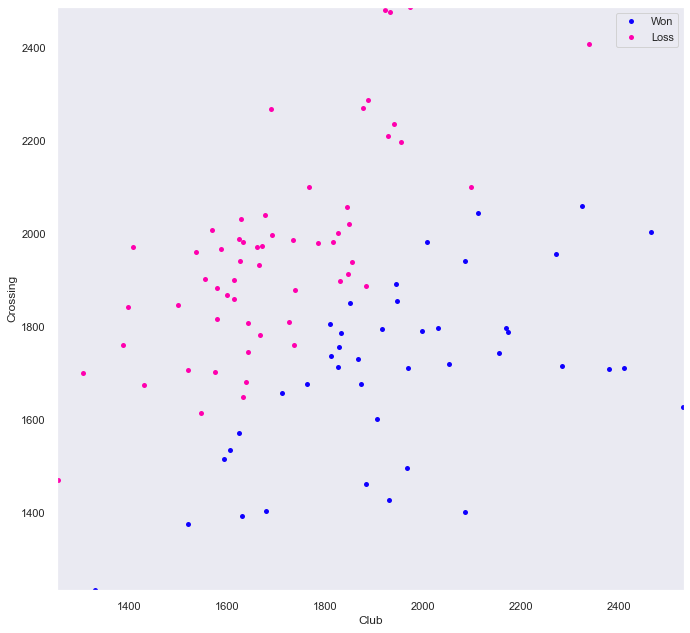

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

ax.axis([np.min(X_train[:,0])-1., np.max(X_train[:,0])+1., np.min(X_train[:,1])-1., np.max(X_train[:,1])+1.])
ax.set_xlabel('2nd half teams')
ax.set_ylabel('1st half teams')
pos = np.where(Y_train.iloc[:,0] == 1)[0] #storing in array if it satisfies Y_train[:,0] == 1
neg = np.where(Y_train.iloc[:,0] == 0)[0] #storing in array if it satisfies y_train[:,0] == 0
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='Won') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='Loss')
Y_train=Y_train[1]
ax.legend()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', max_iter=500, solver='lbfgs')
model.fit(X_train, Y_train.values.flatten())

Y_pred = model.predict_proba(X_train)
print("Y_pred:",Y_pred)

Y_pred: [[0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 5.03440525e-206]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [2.58234982e-008 9.99999974e-001]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [0.00000000

In [ ]:
Y_pred_label = model.predict(X_train)
print("predicted label",Y_pred_label)

predicted label [1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1
 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1]


In [ ]:
from sklearn.metrics import log_loss


log_loss(Y_train, Y_pred)

8.369562244221096e-10

In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(Y_train, Y_pred_label)

1.0

In [ ]:

team = data.groupby('Club',as_index=False)['Overall'].mean()
team

#label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
team['Club']= label_encoder.fit_transform(team['Club'])
team


,Club,Overall
0,0,65.586207
1,1,65.750000
2,2,63.384615
3,3,70.785714
4,4,65.615385
...,...,...
646,646,60.760000
647,647,66.900000
648,648,60.481481
649,649,63.545455


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(team, team.Overall, test_size=0.2)
y_train

248    62.000000
92     53.652174
525    68.769231
634    61.840000
145    67.785714
         ...    
413    62.260870
46     70.150000
377    70.785714
261    70.480000
84     72.964286
Name: Overall, Length: 520, dtype: float64

In [ ]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

lab = preprocessing.LabelEncoder()
y_transformed_test = lab.fit_transform(y_test)

Logistic reg

In [ ]:
team['Club']

0        0
1        1
2        2
3        3
4        4
      ... 
646    646
647    647
648    648
649    649
650    650
Name: Club, Length: 651, dtype: int32

In [ ]:



model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train,y_transformed)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
model.predict(X_test)

array([ 72, 239,  72, 276,  85, 239, 239,  72,  85,  72, 239,  85,  72,
       264, 239, 432, 239, 276, 239, 239, 239, 239, 264, 264,  85, 264,
       239,  72, 264,  85, 239, 239, 264,  85,  72,  72, 239, 239, 239,
       239,  85,  72, 239, 223, 264, 239, 239,  72, 239,  85, 239, 239,
       239, 239, 239, 264,  72,  85, 239,  96,  72, 239,  85, 239, 239,
        85,  85, 239, 239,  85, 239, 239, 239,  72,  72,  85, 264, 239,
       239,  72, 239,  72,  85, 239, 103, 103,  72, 239,  72, 379,  72,
        85,  85,  85,  72,  72, 239, 264, 239,  72, 239, 239,  72, 239,
       239, 239,  72, 239, 239, 239, 264,  85, 239,  72, 239, 379, 276,
        85,  85,  72,  72, 103, 264, 239, 239, 417,  72,  85,  72,  72,
       239], dtype=int64)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_transformed)

# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[144   3  20 214  98  61  85  12 226  59  11  19 118 156  97 172  22 266
  74 194  10  84  48 156   9  80   5  12 287  28 120 139  71  35 205   9
 198 137  61 175  13 118 161 140 135 117  25  55 209 123 136  61  74 111
   3  71  55  85 219  27 106 410  19 200 308   2  60 199  29 255  68 215
 410 205  72  98  54  41  49  26 134  44 101 103  15   7 118 122  44 140
 144  13 159  40 233 142 129  48 159 106 176  74 173  61 102  74  59  97
 159  10  48  28 127   4 111  36 160 164  13 256  20  15  79 149 157 196
 144  72   1 242  97]


In [ ]:
print(knn.score(X_test, y_transformed_test))

0.007633587786259542


Decision Tree

In [ ]:
from sklearn import tree


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_transformed)

tree.plot_tree(clf)

[Text(0.22343418961864406, 0.9905660377358491, 'X[1] <= 62.017\ngini = 0.998\nsamples = 520\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1\n1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1\n2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2\n1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1\n1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1\n1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1\n1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1

Error in callback <function flush_figures at 0x0000017E2A567DC0> (for post_execute):


KeyboardInterrupt: 